<a href="https://colab.research.google.com/github/devesh962/Musk_Non-Musk_molecule_classifier/blob/master/binary_molecule_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score, precision_score, recall_score

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


## **Loading The Dataset**



In [0]:
data=pd.read_csv("/gdrive/My Drive/Credicxo/musk_csv.csv")

### **Visualization of the Dataset**

In [4]:
data.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,...,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,-161,-8,5,-323,-220,-113,-299,-283,-307,-31,-106,-227,-42,-59,-22,-67,189,81,17,-27,-89,-67,105,-116,124,-106,5,-120,63,-165,...,81,-114,-187,45,-118,-75,-182,-234,-19,12,-13,-41,-119,-149,70,17,-20,-177,-101,-116,-14,-50,24,-81,-125,-114,-44,128,3,-244,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,-171,-39,-100,-319,-111,-228,-281,-281,-300,54,-149,-98,-196,-27,-22,2,75,49,-34,45,-91,32,95,-116,85,-23,42,-58,61,-171,...,88,-21,-32,32,-128,-72,-124,-218,-94,53,-79,-20,-35,-26,4,50,17,-177,-102,-121,-66,-77,51,-41,-34,-32,-63,115,-5,-235,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,-168,-39,-22,-319,-111,-104,-283,-282,-303,52,-152,-97,-225,-28,-22,2,179,49,-33,46,-88,22,79,-116,19,-11,6,-38,71,-175,...,64,0,-23,-15,-129,-74,-125,-221,-93,53,-72,-19,-33,-26,3,49,17,-177,-102,-119,-66,-81,51,-41,-27,-41,-140,77,-163,-238,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,77,48,-34,46,-91,32,94,-116,84,-23,41,-58,62,-171,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-77,52,-41,-34,-32,-66,115,-7,-236,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,78,48,-34,46,-91,31,94,-116,84,-23,41,-58,62,-171,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-76,52,-41,-34,-32,-66,115,-8,-236,-60,-4,52,104,137,168,-60,-135,80,1


# **Preprocessing**

Checking if there are any missing values in the dataset.

In [5]:
data.isna().sum()

ID                   0
molecule_name        0
conformation_name    0
f1                   0
f2                   0
                    ..
f163                 0
f164                 0
f165                 0
f166                 0
class                0
Length: 170, dtype: int64

Dropping columns based on high correlation

In [0]:
# Create correlation matrix
corr_matrix = data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.89)]


In [0]:
# drop features
df = data.drop(columns = to_drop)

In [8]:
df.shape

(6598, 108)

Splitting the dataset into train and test(80:20)

In [9]:
train,test = train_test_split(df, random_state=30, test_size = 0.2)
X_train = train.iloc[:,3:-1]
Y_train = train.iloc[:,-1:]
X_test = test.iloc[:,3:-1]
Y_test = test.iloc[:,-1:]
X_train.shape

(5278, 104)

Importing libraries to create the model

In [0]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

In [0]:
x_train=X_train.values.reshape(X_train.shape[0],13,8,1)
x_test=X_test.values.reshape(X_test.shape[0],13,8,1)

In [14]:
x_train.shape
x_test.shape

(1320, 13, 8, 1)

# **Model(CNN with added batch normalization and dropout)**

In [0]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(13,8,1)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1,activation='sigmoid'))

Loss_function(binary_crossentropy), optimizer(Adam)

In [0]:

model.compile(loss=keras.losses.binary_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [17]:
history = model.fit(x_train,Y_train,batch_size=128,epochs=15,validation_data=(x_test,Y_test))
score=model.evaluate(x_test,Y_test,verbose=0)
print(score)



Train on 5278 samples, validate on 1320 samples
Epoch 1/15
5278/5278 [==============================] - 2s 409us/step - loss: 0.4066 - acc: 0.8668 - val_loss: 0.1657 - val_acc: 0.9364
Epoch 2/15
5278/5278 [==============================] - 0s 50us/step - loss: 0.1519 - acc: 0.9439 - val_loss: 0.1235 - val_acc: 0.9530
Epoch 3/15
5278/5278 [==============================] - 0s 52us/step - loss: 0.1098 - acc: 0.9555 - val_loss: 0.0977 - val_acc: 0.9576
Epoch 4/15
5278/5278 [==============================] - 0s 45us/step - loss: 0.0885 - acc: 0.9674 - val_loss: 0.0914 - val_acc: 0.9629
Epoch 5/15
5278/5278 [==============================] - 0s 48us/step - loss: 0.0699 - acc: 0.9720 - val_loss: 0.0733 - val_acc: 0.9689
Epoch 6/15
5278/5278 [==============================] - 0s 50us/step - loss: 0.0601 - acc: 0.9769 - val_loss: 0.0638 - val_acc: 0.9735
Epoch 7/15
5278/5278 [==============================] - 0s 50us/step - loss: 0.0495 - acc: 0.9801 - val_loss: 0.0708 - val_acc: 0.9727
Epoc

# **Loss and Accuracy Curves**

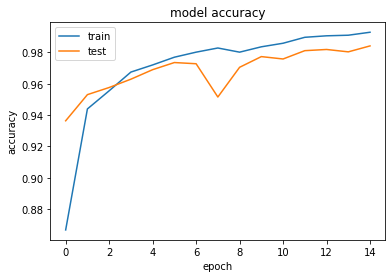

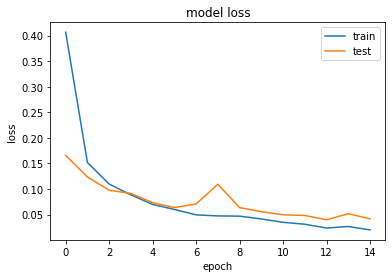

In [18]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# **Performance Measures**

In [19]:

print("f1_score:",f1_score(Y_test,model.predict_classes(x_test),))
print("recall:",recall_score(Y_test,model.predict_classes(x_test),))
print("precision:",precision_score(Y_test,model.predict_classes(x_test),))
print("Validation Loss:",score[0])
print("Validation Accuracy:",score[1])

f1_score: 0.9473684210526315
recall: 0.9792746113989638
precision: 0.9174757281553398
Validation Loss: 0.04168009318721791
Validation Accuracy: 0.9840909090909091


Saving the Model

In [0]:
model.save("/gdrive/My Drive/Credicxo/model.h5")